<a href="https://colab.research.google.com/github/Nsarkar-XLR8/ML_Code/blob/main/KNN_Classfier_%26_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

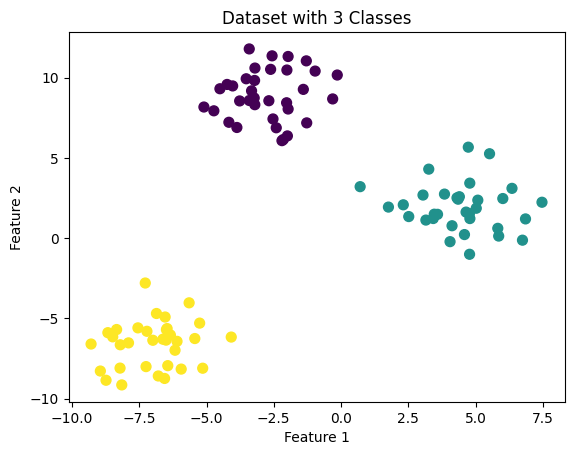

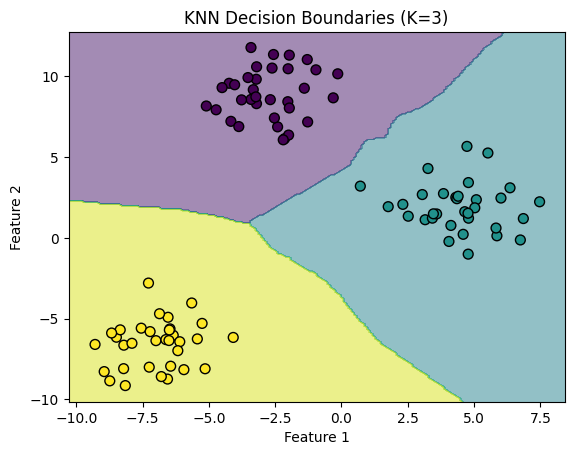

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data
np.random.seed(42)
X, y = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=1.5)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title("Dataset with 3 Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Fit KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a mesh to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("KNN Decision Boundaries (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


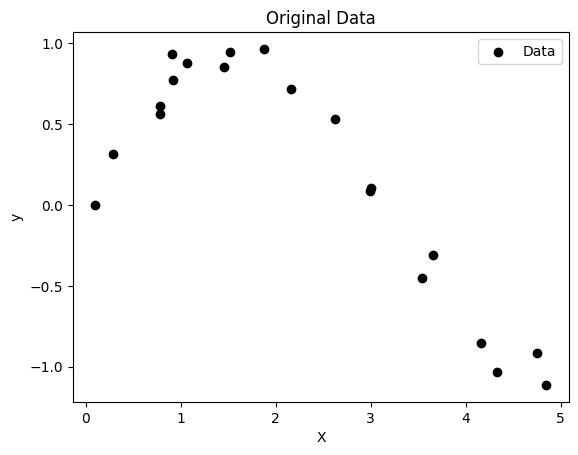

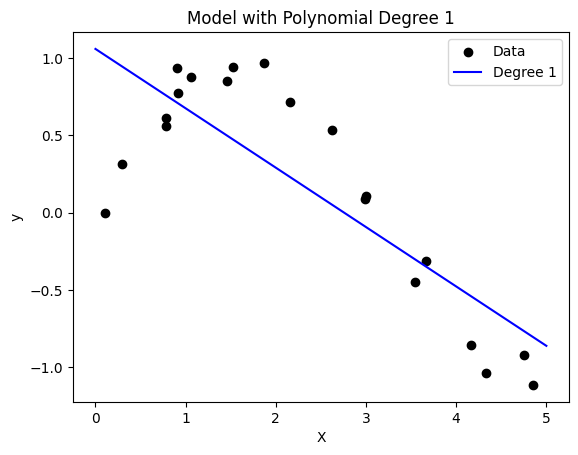

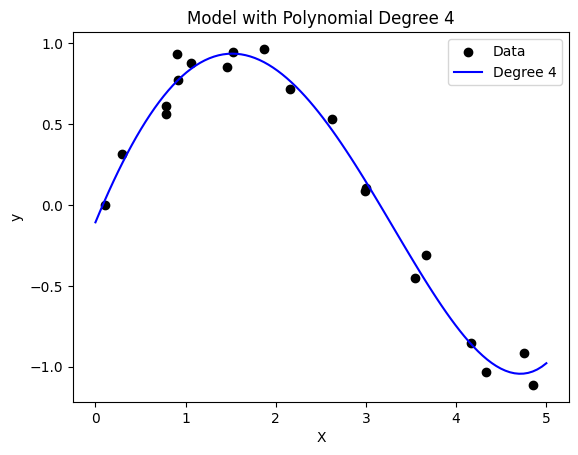

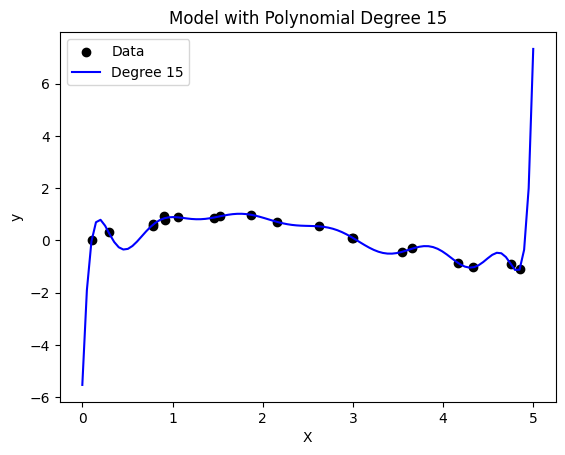

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Generate some synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(20, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Plot the original data
plt.scatter(X, y, color='black', label="Data")
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Helper function to plot models
def plot_model(degree):
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree)),
        ('lin_reg', LinearRegression())
    ])
    model.fit(X, y)
    X_test = np.linspace(0, 5, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)
    plt.scatter(X, y, color='black', label="Data")
    plt.plot(X_test, y_pred, label=f"Degree {degree}", color='blue')
    plt.title(f"Model with Polynomial Degree {degree}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Underfitting (Degree = 1)
plot_model(1)

# Balanced Fit (Degree = 4)
plot_model(4)

# Overfitting (Degree = 15)
plot_model(15)


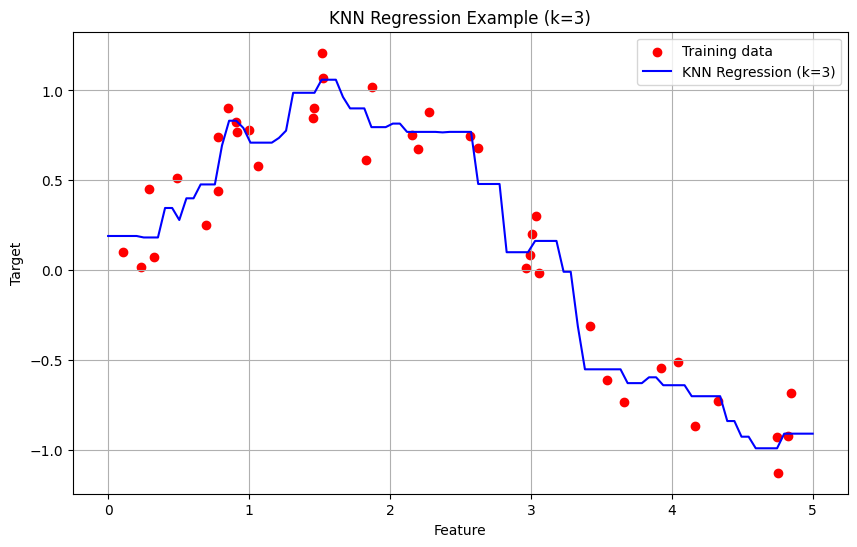

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generate sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # Add noise to the sine wave

# Test data
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

# KNN Regression model (with k=3)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="red", label="Training data")
plt.plot(X_test, y_pred, color="blue", label="KNN Regression (k=3)")
plt.title("KNN Regression Example (k=3)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid()
plt.show()
